In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
print(os.listdir("../input/cifar-100-python/cifar-100-python/"))

# Any results you write to the current directory are saved as output.

['cifar-100-python']
['train', 'test', 'meta', 'file.txt~']


# Bouding Boxes

In [42]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# Getting data from the human super class

In [26]:
file_path = '../input/cifar-100-python/cifar-100-python/'
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train = unpickle(file_path + 'train')
test = unpickle(file_path + 'test')

The CIFAR-100 dataset has 100 fine labels and 20 coarse labels. Since we only care about data where there are people in the image, we want to get rid of all the data where the coarse label does not equal 15, the people class. 

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [3]:
#Making a dico with both the training and test datasets
data = dict(train)
data.update(test)

In [4]:
data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

Just to make this easier, I am going to cast the dictionary to a pandas dataframe. 

In [67]:
labels = data[b'coarse_labels']
pics = data[b'data']
#pics.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
people = []
for i in range(0,len(labels)):
    if(labels[i] == 14): #Its a person
        people.append(pics[i])

In [61]:
len(people)

500

In [47]:
x = data[b'data'][0]

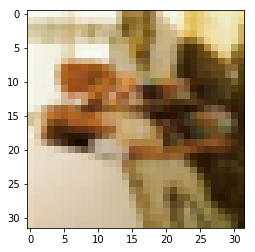

In [68]:
tets = people[4].reshape(3,32,32)
plt.imshow(tets.T, interpolation='nearest')

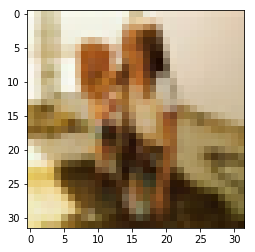

In [69]:
plt.imshow(np.transpose(tets, (1, 2, 0)))

TypeError: Invalid dimensions for image data

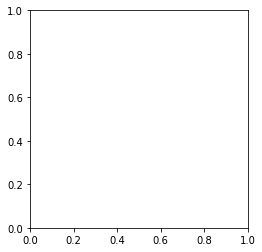

In [35]:
example = people[30]
plt.imshow(example)
plt.title('People data item')
plt.show()

TypeError: Invalid dimensions for image data

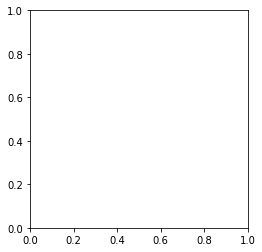